**Movies recomendation system**

the following code wants to propose a movies recomendation system, the dataset comes from: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import ast

**Data expolarion**

In [3]:
CREDITS = "/content/drive/MyDrive/movie_recomendation/movies_dataframe/credits.csv"
KEYWORDS = "/content/drive/MyDrive/movie_recomendation/movies_dataframe/keywords.csv"
MOVIES_METADATA = "/content/drive/MyDrive/movie_recomendation/movies_dataframe/movies_metadata.csv"

In [4]:
credits = pd.read_csv(CREDITS)

In [5]:
keywords = pd.read_csv(KEYWORDS)

In [6]:
movies_metadata = pd.read_csv(MOVIES_METADATA, low_memory=False)

In [7]:
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')
movies_metadata.dropna(subset=['id'], inplace=True)

In [8]:
movies_df = pd.merge(movies_metadata, credits, on = ["id"])
movies_df = pd.merge(movies_df, keywords, on = ["id"])

In [9]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')

<Axes: >

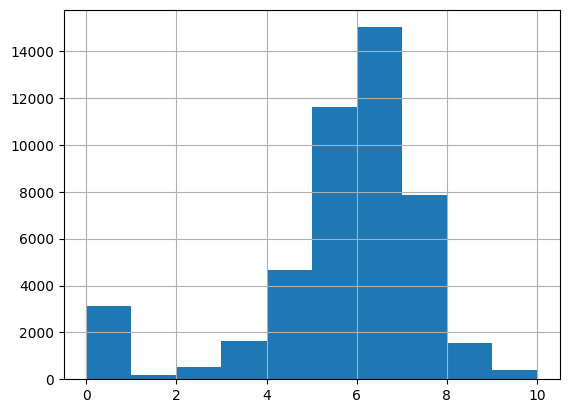

In [10]:
movies_df['vote_average'].hist()

<Axes: >

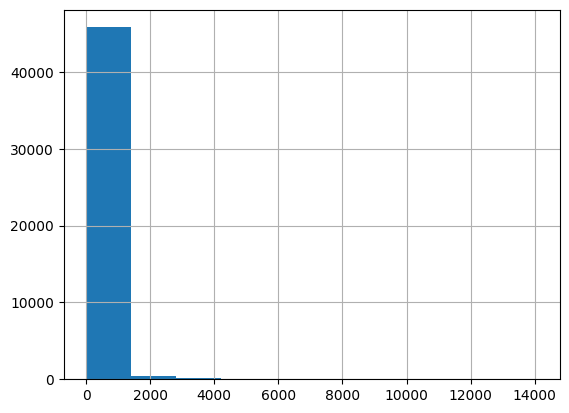

In [11]:
movies_df['vote_count'].hist()

In [12]:
movies_df = movies_df.loc[(movies_df['vote_average']>=5) & (movies_df['vote_count']>1000)]

In [13]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 46005
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  1120 non-null   object 
 1   belongs_to_collection  454 non-null    object 
 2   budget                 1120 non-null   object 
 3   genres                 1120 non-null   object 
 4   homepage               690 non-null    object 
 5   id                     1120 non-null   float64
 6   imdb_id                1120 non-null   object 
 7   original_language      1120 non-null   object 
 8   original_title         1120 non-null   object 
 9   overview               1120 non-null   object 
 10  popularity             1120 non-null   object 
 11  poster_path            1120 non-null   object 
 12  production_companies   1120 non-null   object 
 13  production_countries   1120 non-null   object 
 14  release_date           1120 non-null   object 
 15  rev

In [14]:
movies_df.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [15]:
movies_df = movies_df[["genres", "original_title", "overview", "poster_path", "cast", "crew", "keywords"]]

In [16]:
movies_df.dropna(inplace = True)

<ipython-input-16-f63c43984f10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.dropna(inplace = True)


In [17]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [18]:
movies_df["genres"] = movies_df["genres"].apply(convert)
movies_df["keywords"] = movies_df["keywords"].apply(convert)
movies_df["cast"] = movies_df["cast"].apply(convert)

<ipython-input-18-b555931bb31c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["genres"] = movies_df["genres"].apply(convert)


In [19]:
movies_df.head(3)

,genres,original_title,overview,poster_path,cast,crew,keywords
0,"[Animation, Comedy, Family]",Toy Story,"Led by Woody, Andy's toys live happily in his ...",/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva..."
1,"[Adventure, Fantasy, Family]",Jumanji,When siblings Judy and Peter discover an encha...,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'..."
5,"[Action, Crime, Drama, Thriller]",Heat,"Obsessive master thief, Neil McCauley leads a ...",/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[robbery, detective, bank, obsession, chase, s..."


In [20]:
def get_director(obj):
    director = []
    for i in ast.literal_eval(obj):
        if i['job'] == "Director":
            director.append(i['name'])
    return director

In [21]:
movies_df["director"] = movies_df["crew"].apply(get_director)

In [22]:
movies_df = movies_df.drop(['crew', 'overview'], axis=1)

In [23]:
movies_df.head(1)

,genres,original_title,poster_path,cast,keywords,director
0,"[Animation, Comedy, Family]",Toy Story,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends, riva...",[John Lasseter]


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [25]:
text_columns = ["genres", "cast", "keywords", "director"]

for column in text_columns:
        # If the column is 'tags', apply 'lower()' to each element in the list
        movies_df[column] = movies_df[column].apply(lambda tags: [tag.lower() for tag in tags])

In [26]:
movies_df.head()

,genres,original_title,poster_path,cast,keywords,director
0,"[animation, comedy, family]",Toy Story,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[tom hanks, tim allen, don rickles, jim varney...","[jealousy, toy, boy, friendship, friends, riva...",[john lasseter]
1,"[adventure, fantasy, family]",Jumanji,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[robin williams, jonathan hyde, kirsten dunst,...","[board game, disappearance, based on children'...",[joe johnston]
5,"[action, crime, drama, thriller]",Heat,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[al pacino, robert de niro, val kilmer, jon vo...","[robbery, detective, bank, obsession, chase, s...",[michael mann]
9,"[adventure, action, thriller]",GoldenEye,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[pierce brosnan, sean bean, izabella scorupco,...","[cuba, falsely accused, secret identity, compu...",[martin campbell]
15,"[drama, crime]",Casino,/xo517ibXBDdYQY81j0WIG7BVcWq.jpg,"[robert de niro, sharon stone, joe pesci, jame...","[poker, drug abuse, 1970s, overdose, illegal p...",[martin scorsese]


In [27]:
for col in text_columns:
    if col != "original_title" and col != "poster_path":
        movies_df[col] = movies_df[col].apply(lambda x: ' '.join(x))

In [28]:
movies_df.head(1)

,genres,original_title,poster_path,cast,keywords,director
0,animation comedy family,Toy Story,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,tom hanks tim allen don rickles jim varney wal...,jealousy toy boy friendship friends rivalry bo...,john lasseter


In [29]:
movies_df['total'] =movies_df['director'] + " " + + movies_df['genres'] + " " + movies_df['cast']  + " " + movies_df['keywords']

In [30]:
movies_df.head()

,genres,original_title,poster_path,cast,keywords,director,total
0,animation comedy family,Toy Story,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,tom hanks tim allen don rickles jim varney wal...,jealousy toy boy friendship friends rivalry bo...,john lasseter,john lasseter animation comedy family tom hank...
1,adventure fantasy family,Jumanji,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,robin williams jonathan hyde kirsten dunst bra...,board game disappearance based on children's b...,joe johnston,joe johnston adventure fantasy family robin wi...
5,action crime drama thriller,Heat,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,al pacino robert de niro val kilmer jon voight...,robbery detective bank obsession chase shootin...,michael mann,michael mann action crime drama thriller al pa...
9,adventure action thriller,GoldenEye,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,pierce brosnan sean bean izabella scorupco fam...,cuba falsely accused secret identity computer ...,martin campbell,martin campbell adventure action thriller pier...
15,drama crime,Casino,/xo517ibXBDdYQY81j0WIG7BVcWq.jpg,robert de niro sharon stone joe pesci james wo...,poker drug abuse 1970s overdose illegal prosti...,martin scorsese,martin scorsese drama crime robert de niro sha...


In [31]:
movies_df.reset_index(inplace = True)

In [32]:
films = movies_df[movies_df['director']== "martin scorsese"]

In [33]:
films

,index,genres,original_title,poster_path,cast,keywords,director,total
4,15,drama crime,Casino,/xo517ibXBDdYQY81j0WIG7BVcWq.jpg,robert de niro sharon stone joe pesci james wo...,poker drug abuse 1970s overdose illegal prosti...,martin scorsese,martin scorsese drama crime robert de niro sha...
12,109,crime drama,Taxi Driver,/yxq4pk1xGmro8tQABuQIrWrvdaE.jpg,robert de niro cybill shepherd harvey keitel j...,vietnam veteran taxi obsession drug dealer nig...,martin scorsese,martin scorsese crime drama robert de niro cyb...
93,1191,drama crime,GoodFellas,/hAPeXBdGDGmXRPj4OZZ0poH65Iu.jpg,robert de niro ray liotta joe pesci lorraine b...,prison based on novel florida 1970s mass murde...,martin scorsese,martin scorsese drama crime robert de niro ray...
304,5880,drama history crime,Gangs of New York,/ytKo2tLvKUd9Kbs0poXSQh6ft7d.jpg,leonardo dicaprio daniel day-lewis cameron dia...,fire irish-american immigrant gang war pickpoc...,martin scorsese,martin scorsese drama history crime leonardo d...
381,9623,drama,The Aviator,/3MKBQgIHI5DPVNvryiTesskS5mf.jpg,leonardo dicaprio cate blanchett kate beckinsa...,ladykiller pilot biography womanizer aviation ...,martin scorsese,martin scorsese drama leonardo dicaprio cate b...
440,11418,drama thriller crime,The Departed,/tGLO9zw5ZtCeyyEWgbYGgsFxC6i.jpg,leonardo dicaprio matt damon jack nicholson ma...,undercover boston police friends mafia underco...,martin scorsese,martin scorsese drama thriller crime leonardo ...
593,14997,drama thriller mystery,Shutter Island,/aZqKsvpJDFy2UzUMsdskNFbfkOd.jpg,leonardo dicaprio mark ruffalo ben kingsley em...,based on novel island hurricane investigation ...,martin scorsese,martin scorsese drama thriller mystery leonard...
692,18282,adventure drama family,Hugo,/fkeaJr29ypea1n24gzspsc7qK44.jpg,ben kingsley sacha baron cohen asa butterfield...,library clock film director key toy boy love o...,martin scorsese,martin scorsese adventure drama family ben kin...
845,22329,crime drama comedy,The Wolf of Wall Street,/vK1o5rZGqxyovfIhZyMELhk03wO.jpg,leonardo dicaprio jonah hill margot robbie kyl...,corruption sex sexuality bank humor biography ...,martin scorsese,martin scorsese crime drama comedy leonardo di...


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv =  CountVectorizer(stop_words = "english")

In [35]:
cv_total = cv.fit_transform(movies_df['total'])

In [36]:
cv_total.shape

(1120, 24206)

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(cv_total)

In [50]:
def recomend(movie):
    if movie in movies_df['original_title'].values:
        movie_index = movies_df[movies_df['original_title']==movie].index[0]
        distances = similarity[movie_index]
        movies_list = sorted(list(enumerate(distances)), reverse = True, key= lambda x:x[1])[1:6]

        for i in movies_list:
            print(movies_df.iloc[i[0]].original_title)
    else:
        print(f'I am sorry but, {movie} is not in database')

In [51]:
recomend("Match Point")

The Notebook
Titanic
Notting Hill
Annie Hall
The Bourne Ultimatum
